In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import make_scorer

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingCVClassifier

In [2]:
import os
CURR_DIR = os.getcwd()
print(f"CURR_DIR: {CURR_DIR}")

BRCA_DATA_DIR = os.path.join(CURR_DIR, '..', 'data')
TRAINING_DATA_CSV = 'training_data_70_perc.csv'
TESTING_DATA_CSV = 'testing_data_30_perc.csv'

TRAINING_DATA_CSV_PATH = os.path.normpath(os.path.join(BRCA_DATA_DIR, TRAINING_DATA_CSV))
TESTING_DATA_CSV_PATH = os.path.normpath(os.path.join(BRCA_DATA_DIR, TESTING_DATA_CSV))

print(f"TRAINING_DATA_CSV_PATH: {TRAINING_DATA_CSV_PATH}, TESTING_DATA_CSV_PATH: {TESTING_DATA_CSV_PATH}")

CURR_DIR: /home/users/nus/csipav/Documents/IS5152-classification-BRCA/SVM-method
TRAINING_DATA_CSV_PATH: /home/users/nus/csipav/Documents/IS5152-classification-BRCA/data/training_data_70_perc.csv, TESTING_DATA_CSV_PATH: /home/users/nus/csipav/Documents/IS5152-classification-BRCA/data/testing_data_30_perc.csv


In [3]:

print("Training dataset")
df_cancer_train = pd.read_csv(TRAINING_DATA_CSV_PATH)
print(df_cancer_train.shape)
df_cancer_train.head()



Training dataset
(398, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,'concave points_mean',...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,'concave points_worst',symmetry_worst,fractal_dimension_worst
0,908445,M,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,...,22.66,30.93,145.3,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314
1,888570,M,17.29,22.13,114.40,947.8,0.08999,0.12730,0.09697,0.07507,...,20.39,27.24,137.9,1295.0,0.1134,0.2867,0.2298,0.15280,0.3067,0.07484
2,865432,B,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,...,15.70,15.98,102.8,745.5,0.1313,0.1788,0.2560,0.12210,0.2889,0.08006
3,909445,M,17.27,25.42,112.40,928.8,0.08331,0.11090,0.12040,0.05736,...,20.38,35.46,132.8,1284.0,0.1436,0.4122,0.5036,0.17390,0.2500,0.07944
4,89511502,B,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,...,13.71,21.10,88.7,574.4,0.1384,0.1212,0.1020,0.05602,0.2688,0.06888


In [4]:
print("Testing dataset")
df_cancer_test = pd.read_csv(TESTING_DATA_CSV_PATH)
print(df_cancer_test.shape)
df_cancer_test.head()

Testing dataset
(171, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,'concave points_mean',...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,'concave points_worst',symmetry_worst,fractal_dimension_worst
0,911320501,B,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,...,12.77,24.02,82.68,495.1,0.1342,0.1808,0.1860,0.08288,0.3210,0.07863
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,872608,B,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,...,11.26,24.39,73.07,390.2,0.1301,0.2950,0.3486,0.09910,0.2614,0.11620
4,88143502,B,14.340,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.04603,...,16.77,16.90,110.40,873.2,0.1297,0.1525,0.1632,0.10870,0.3062,0.06072


In [5]:
excluded_columns = [
    'concavity_se',
    'texture_worst',
    'texture_mean',
    'symmetry_worst',
    "'concave points_se'",
    'smoothness_worst',
    'compactness_se',
    'smoothness_mean',
    'symmetry_mean',
    'fractal_dimension_worst',
    'fractal_dimension_se',
    'fractal_dimension_mean',
    'symmetry_se',
    'texture_se',
    'smoothness_se',
    'id',
    'diagnosis'
]

excluded_columns_training = [
    'id',
    'diagnosis'
]

cancer_labels=[1, 0]
f1_scorer = make_scorer(f1_score, labels=cancer_labels, pos_label=1)
recall_scorer = make_scorer(recall_score, labels=cancer_labels, pos_label=1)

scaler_mm = MinMaxScaler()
scaler_std = StandardScaler()

KF_K = 5
kf = KFold(n_splits=KF_K) # Define the split

In [6]:
X_train = df_cancer_train.drop(excluded_columns_training, axis=1)


X_train_mm_scaled_values = scaler_std.fit_transform(X_train.values)
X_train_mm_scaled = pd.DataFrame(X_train_mm_scaled_values, columns=X_train.columns)
print(f"Filtered training dataset scaled: {X_train_mm_scaled.shape}")
X_train_mm_scaled.head()



# X_test = df_cancer_test.drop(excluded_columns, axis=1)
X_test = df_cancer_test.drop(excluded_columns_training, axis=1)

X_test_mm_scaled_values = scaler_mm.fit_transform(X_test.values)
X_test_mm_scaled = pd.DataFrame(X_test_mm_scaled_values, columns=X_test.columns)
print(f"Filtered testing dataset scaled: {X_test_mm_scaled.shape}")
X_test_mm_scaled.head()


Filtered training dataset scaled: (398, 30)
Filtered testing dataset scaled: (171, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,'concave points_mean',symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,'concave points_worst',symmetry_worst,fractal_dimension_worst
0,0.191439,0.362683,0.184664,0.103965,0.401261,0.135163,0.078963,0.094622,0.164932,0.216616,...,0.149550,0.319829,0.143307,0.067363,0.428106,0.168579,0.193589,0.284811,0.378575,0.261668
1,0.630736,0.337945,0.604496,0.495838,0.397057,0.212504,0.203799,0.373642,0.327123,0.168424,...,0.596155,0.303571,0.530273,0.429833,0.357468,0.174949,0.251457,0.639175,0.267087,0.377952
2,0.587639,0.483857,0.583867,0.443062,0.704464,0.525331,0.462946,0.681044,0.467945,0.251757,...,0.544258,0.360075,0.498246,0.368549,0.497385,0.436202,0.468776,0.835052,0.476248,0.361835
3,0.108379,0.350105,0.118651,0.056638,0.548535,0.407915,0.306520,0.197870,0.248767,0.783133,...,0.094364,0.329691,0.094454,0.041336,0.400258,0.293990,0.362823,0.340550,0.234125,0.682149
4,0.325628,0.157652,0.317186,0.202008,0.574131,0.203265,0.134240,0.245101,0.471233,0.113454,...,0.295739,0.130064,0.284226,0.161175,0.397541,0.137501,0.169858,0.373540,0.342705,0.061220


In [7]:
X_train_std_scaled_values = scaler_std.fit_transform(X_train.values)
X_train_std_scaled = pd.DataFrame(X_train_std_scaled_values, columns=X_train.columns)

X_test_std_scaled_values = scaler_std.fit_transform(X_test.values)
X_test_std_scaled = pd.DataFrame(X_test_std_scaled_values, columns=X_test.columns)

X_test_std_scaled.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,'concave points_mean',symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,'concave points_worst',symmetry_worst,fractal_dimension_worst
0,-0.656781,-0.231352,-0.681134,-0.626598,-0.899920,-0.876961,-0.682900,-0.781539,-1.154846,-0.679557,...,-0.681245,-0.277045,-0.687116,-0.626901,-0.027326,-0.455798,-0.396599,-0.474411,0.461776,-0.320904
1,1.595460,-0.366170,1.467544,1.561421,-0.925734,-0.501092,-0.024987,0.483869,-0.123844,-0.966249,...,1.595849,-0.374082,1.369729,1.541017,-0.499283,-0.419817,-0.119694,0.992043,-0.324204,0.292177
2,1.374505,0.429029,1.361967,1.266747,0.961716,1.019222,1.340772,1.877991,0.771317,-0.470511,...,1.331244,-0.036839,1.199496,1.174479,0.435554,1.056007,0.920195,1.802632,1.150363,0.207207
3,-1.082622,-0.299904,-1.018981,-0.890847,0.004325,0.448590,0.516373,-0.313290,-0.621930,2.690564,...,-0.962621,-0.218187,-0.946789,-0.782569,-0.213386,0.252647,0.413199,-0.243749,-0.556581,1.895984
4,0.031195,-1.348745,-0.002891,-0.079174,0.161485,-0.545994,-0.391579,-0.099088,0.792215,-1.293256,...,0.064121,-1.409673,0.061908,-0.065816,-0.231538,-0.631358,-0.510150,-0.107229,0.208895,-1.377717


In [8]:
y_train = df_cancer_train['diagnosis']
y_test = df_cancer_test['diagnosis']
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

cancer_mapping = {'M': 1, 'B': 0}
y_train = y_train.map(cancer_mapping)
y_test = y_test.map(cancer_mapping)

y_train.head()

y_train: (398,), y_test: (171,)


0    1
1    1
2    0
3    1
4    0
Name: diagnosis, dtype: int64

# GridSearch - SVC

## Standard Scaler

In [9]:
param_grid = {
    'C': [1, 2, 5],
    'gamma': [0.0001, 0.01, 'scale'],
    'kernel': ['rbf', 'linear'],
    'degree': [2, 3, 4],
    'max_iter': [-1],
    'decision_function_shape': ['ovo', 'ovr'],
    'tol': [1e-3, 1e-5, 1e-6]
}

grid_svc_std = GridSearchCV(SVC(probability=True),param_grid,cv=KF_K,scoring=recall_scorer,refit=True,verbose=1,n_jobs=-1)
grid_svc_std.fit(X_train_std_scaled,y_train)


print (grid_svc_std.best_params_)
print ('\n')
print (grid_svc_std.best_estimator_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1152 tasks      | elapsed:    2.8s


{'C': 2, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'tol': 0.001}


SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    3.4s finished


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       104
           1       0.96      0.97      0.96        67

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



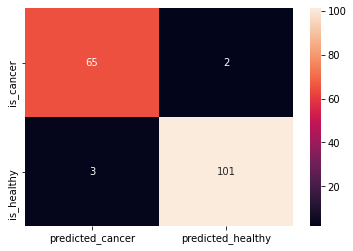

In [10]:
y_predict_std = grid_svc_std.predict(X_test_std_scaled)
cm = confusion_matrix(y_test, y_predict_std)

cm = np.array(confusion_matrix(y_test, y_predict_std, labels=cancer_labels))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])

confusion


print(classification_report(y_test,y_predict_std))
sns.heatmap(confusion,annot=True,fmt="d")

## MinMax Scaler

In [11]:
param_grid = {
    'C': [1, 2, 5],
    'gamma': [0.0001, 0.01, 'scale'],
    'kernel': ['rbf', 'linear'],
    'degree': [2, 3, 4],
    'max_iter': [-1],
    'decision_function_shape': ['ovo', 'ovr'],
    'tol': [1e-3, 1e-5, 1e-6]
}

grid_svc_mm = GridSearchCV(SVC(probability=True),param_grid,cv=KF_K,scoring=recall_scorer,refit=True,verbose=1,n_jobs=-1)
grid_svc_mm.fit(X_train_mm_scaled,y_train)


print (grid_svc_mm.best_params_)
print ('\n')
print (grid_svc_mm.best_estimator_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    0.9s


{'C': 2, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'tol': 0.001}


SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    2.2s finished


              precision    recall  f1-score   support

           0       1.00      0.01      0.02       104
           1       0.39      1.00      0.57        67

    accuracy                           0.40       171
   macro avg       0.70      0.50      0.29       171
weighted avg       0.76      0.40      0.23       171



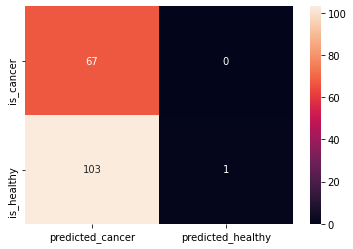

In [12]:
y_predict = grid_svc_mm.predict(X_test_mm_scaled)
cm = confusion_matrix(y_test, y_predict)

cm = np.array(confusion_matrix(y_test, y_predict, labels=cancer_labels))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])

confusion


print(classification_report(y_test,y_predict))
sns.heatmap(confusion,annot=True,fmt="d")

## Comparison - MinMax, Standard

In [13]:
k_fold_models = [
    {'name': 'SVM MinMax', 'model': grid_svc_mm},
    {'name': 'SVM Standard', 'model': grid_svc_std}
]

column_names = ['Scaling Method', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC']
k_fold_res_df = pd.DataFrame(columns=column_names)

for item in k_fold_models:
    eval_model = item['model']
    eval_name = item['name']
    print(f"Evaluating model: {item['name']}")
    
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    cohen_kappa_scores = []
    roc_auc_scores = []
    
    if eval_name == 'SVM MinMax':
        kf_split = kf.split(X_train_mm_scaled)
    elif eval_name == 'SVM Standard':
        kf_split = kf.split(X_train_std_scaled)
    else: # fail
        kf_split = None
        
        
    for train_index, test_index in kf_split:
        
        if eval_name == 'SVM MinMax':
            X_k_train = X_train_mm_scaled[X_train_mm_scaled.index.isin(train_index)]
            X_k_test = X_train_mm_scaled[X_train_mm_scaled.index.isin(test_index)]
        elif eval_name == 'SVM Standard':
            X_k_train = X_train_std_scaled[X_train_std_scaled.index.isin(train_index)]
            X_k_test = X_train_std_scaled[X_train_std_scaled.index.isin(test_index)]
        else: # fail
            X_k_train = None
            X_k_test = None

        y_k_train = y_train[y_train.index.isin(train_index)]
        y_k_test = y_train[y_train.index.isin(test_index)]

        print(f"TRAIN: {len(train_index)}, TEST: {len(test_index)}, X_k_train: {X_k_train.shape}, X_k_test: {X_k_test.shape}")

        eval_model.fit(X_k_train, y_k_train)
        predictions = eval_model.predict(X_k_test)
        predictions_proba = eval_model.predict_proba(X_k_test)

        accuracy_scores.append(accuracy_score(y_k_test, predictions))
        precision_scores.append(precision_score(y_k_test, predictions, average="macro"))
        recall_scores.append(recall_score(y_k_test, predictions, average="macro"))
        f1_scores.append(f1_score(y_k_test, predictions, average="macro"))
        roc_auc_scores.append(roc_auc_score(y_k_test, predictions_proba[:,1]))
    
    print(f"SVC K-Fold mean_accuracy_score: {np.round(np.mean(accuracy_scores), 3)}, accuracy_scores: {accuracy_scores}")
    print(f"SVC K-Fold mean_precision_score: {np.round(np.mean(precision_scores), 3)}, precision_scores: {precision_scores}")
    print(f"SVC K-Fold mean_recall_score: {np.round(np.mean(recall_scores), 3)}, recall_scores: {recall_scores}")
    print(f"SVC K-Fold mean_f1_score: {np.round(np.mean(f1_scores), 3)}, f1_scores: {f1_scores}")
    print(f"SVC K-Fold mean_roc_auc_score: {np.round(np.mean(roc_auc_scores), 3)}, roc_auc_scores: {roc_auc_scores}")

    result = {
        'Scaling Method': eval_name,
        'Accuracy': np.round(np.mean(accuracy_scores), 3).flatten(),
        'Precision': np.round(np.mean(precision_scores), 3).flatten(),
        'Recall': np.round(np.mean(recall_scores), 3).flatten(),
        'F1': np.round(np.mean(f1_scores), 3).flatten(),
        'ROC': np.round(np.mean(roc_auc_scores), 3).flatten()
    }
    print(f"result: {result}")
    k_fold_res_df = k_fold_res_df.append(pd.DataFrame(result, columns=column_names))
    print("=================================")




Evaluating model: SVM MinMax
TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1320 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1368 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


TRAIN: 319, TEST: 79, X_k_train: (319, 30), X_k_test: (79, 30)
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1368 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1573 out of 1620 | elapsed:    2.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


TRAIN: 319, TEST: 79, X_k_train: (319, 30), X_k_test: (79, 30)
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


SVC K-Fold mean_accuracy_score: 0.975, accuracy_scores: [0.975, 0.9875, 0.975, 0.9746835443037974, 0.9620253164556962]
SVC K-Fold mean_precision_score: 0.977, precision_scores: [0.9733333333333334, 0.9919354838709677, 0.9791666666666667, 0.9814814814814814, 0.960594315245478]
SVC K-Fold mean_recall_score: 0.969, recall_scores: [0.9733333333333334, 0.9736842105263157, 0.9705882352941176, 0.962962962962963, 0.9629870129870131]
SVC K-Fold mean_f1_score: 0.973, f1_scores: [0.9733333333333334, 0.98242144583608, 0.9742101869761444, 0.9713352685050798, 0.961631860126275]
SVC K-Fold mean_roc_auc_score: 0.993, roc_auc_scores: [0.9946666666666666, 0.9741156169111302, 1.0, 0.9992877492877492, 0.9987012987012988]
result: {'Scaling Method': 'SVM MinMax', 'Accuracy': array([0.975]), 'Precision': array([0.977]), 'Recall': array([0.969]), 'F1': array([0.973]), 'ROC': array([0.993])}
Evaluating model: SVM Standard
TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
Fitting 5 folds for each o

[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1368 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1506 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s


TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


TRAIN: 319, TEST: 79, X_k_train: (319, 30), X_k_test: (79, 30)
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1368 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


TRAIN: 319, TEST: 79, X_k_train: (319, 30), X_k_test: (79, 30)
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1368 tasks      | elapsed:    2.2s


SVC K-Fold mean_accuracy_score: 0.975, accuracy_scores: [0.975, 0.9875, 0.975, 0.9746835443037974, 0.9620253164556962]
SVC K-Fold mean_precision_score: 0.977, precision_scores: [0.9733333333333334, 0.9919354838709677, 0.9791666666666667, 0.9814814814814814, 0.960594315245478]
SVC K-Fold mean_recall_score: 0.969, recall_scores: [0.9733333333333334, 0.9736842105263157, 0.9705882352941176, 0.962962962962963, 0.9629870129870131]
SVC K-Fold mean_f1_score: 0.973, f1_scores: [0.9733333333333334, 0.98242144583608, 0.9742101869761444, 0.9713352685050798, 0.961631860126275]
SVC K-Fold mean_roc_auc_score: 0.993, roc_auc_scores: [0.9946666666666666, 0.9741156169111302, 1.0, 0.9992877492877492, 0.9987012987012988]
result: {'Scaling Method': 'SVM Standard', 'Accuracy': array([0.975]), 'Precision': array([0.977]), 'Recall': array([0.969]), 'F1': array([0.973]), 'ROC': array([0.993])}


[Parallel(n_jobs=-1)]: Done 1573 out of 1620 | elapsed:    2.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    2.6s finished


,Accuracy,Precision,Recall,F1,ROC
Scaling Method,,,,,
SVM MinMax,0.975,0.977,0.969,0.973,0.993
SVM Standard,0.975,0.977,0.969,0.973,0.993


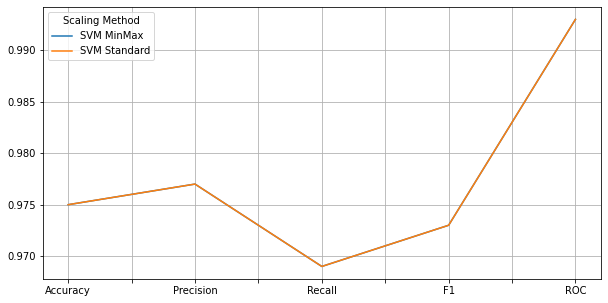

In [14]:
k_fold_res_df.set_index('Scaling Method', inplace=True)
invert_scale_scores_df = k_fold_res_df.transpose()

invert_scale_scores_df.plot(figsize=(10,5), grid=True)

k_fold_res_df.head()

Evaluating model: SVM MinMax
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1368 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


result: {'Scaling Method': 'SVM MinMax', 'Accuracy': array([0.39766082]), 'Precision': array([0.69705882]), 'Recall': array([0.50480769]), 'F1': array([0.29222423]), 'ROC': array([0.99540758])}
Evaluating model: SVM Standard
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1368 tasks      | elapsed:    2.2s


result: {'Scaling Method': 'SVM Standard', 'Accuracy': array([0.97076023]), 'Precision': array([0.96823244]), 'Recall': array([0.97065155]), 'F1': array([0.96940419]), 'ROC': array([0.99483352])}


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    2.6s finished


,Accuracy,Precision,Recall,F1,ROC
Scaling Method,,,,,
SVM MinMax,0.397661,0.697059,0.504808,0.292224,0.995408
SVM Standard,0.970760,0.968232,0.970652,0.969404,0.994834


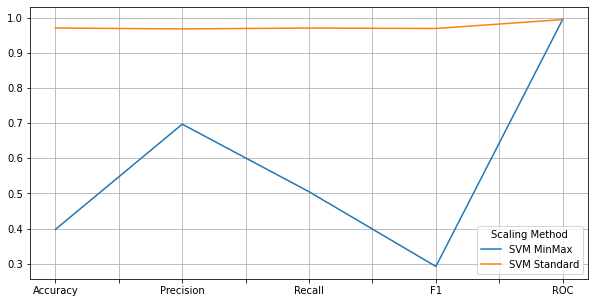

In [15]:
k_fold_models = [
    {'name': 'SVM MinMax', 'model': grid_svc_mm},
    {'name': 'SVM Standard', 'model': grid_svc_std}
]
column_names = ['Scaling Method', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC']
k_fold_res_df = pd.DataFrame(columns=column_names)

for item in k_fold_models:
    eval_model = item['model']
    eval_name = item['name']
    print(f"Evaluating model: {item['name']}")
    
    if eval_name == 'SVM MinMax':
        X_k_train = X_train_mm_scaled
        X_k_test = X_test_mm_scaled
    elif eval_name == 'SVM Standard':
        X_k_train = X_train_std_scaled
        X_k_test = X_test_std_scaled
    else: # fail
        X_k_train = None
        X_k_test = None
        
    eval_model.fit(X_k_train, y_train)
    predictions = eval_model.predict(X_k_test)
    predictions_proba = eval_model.predict_proba(X_k_test)
    
    result = {
        'Scaling Method': eval_name,
        'Accuracy': accuracy_score(y_test, predictions).flatten(),
        'Precision': precision_score(y_test, predictions, average="macro").flatten(),
        'Recall': recall_score(y_test, predictions, average="macro").flatten(),
        'F1': f1_score(y_test, predictions, average="macro").flatten(),
        'ROC': roc_auc_score(y_test, predictions_proba[:,1]).flatten()
    }
    print(f"result: {result}")
    k_fold_res_df = k_fold_res_df.append(pd.DataFrame(result, columns=column_names))
    print("=================================")
    

    
k_fold_res_df.set_index('Scaling Method', inplace=True)
invert_scale_scores_df = k_fold_res_df.transpose()

invert_scale_scores_df.plot(figsize=(10,5), grid=True)

k_fold_res_df.head()

## GridSearch - SVC with Bagging

In [16]:
param_grid = {
    'base_estimator': [SVC(probability=True)],
    'n_estimators': [20, 50, 100],
    'max_features' : [0.2, 0.5, 1.0],
    'max_samples' : [0.5, 0.8, 1.0],
    'base_estimator__C': [1, 2, 5],
    'base_estimator__gamma': [0.0001, 0.01, 'scale'],
    'base_estimator__kernel': ['rbf', 'linear'],
    'base_estimator__degree': [2, 3, 4],
    'base_estimator__max_iter': [-1],
    'base_estimator__decision_function_shape': ['ovo', 'ovr'],
    'base_estimator__tol': [1e-3, 1e-5]
}

grid_svc_bagging_std = GridSearchCV(
    BaggingClassifier(),param_grid,cv=KF_K,scoring=recall_scorer,refit=True,verbose=1,n_jobs=-1
)
grid_svc_bagging_std.fit(X_train_std_scaled,y_train)


print (grid_svc_bagging_std.best_params_)
print ('\n')
print (grid_svc_bagging_std.best_estimator_)

Fitting 5 folds for each of 5832 candidates, totalling 29160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 254 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 1322 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 1872 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 2522 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 3272 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 4122 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 5072 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6122 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7272 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 8522 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 9872 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 11322 tasks      

{'base_estimator': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=1e-05,
    verbose=False), 'base_estimator__C': 1, 'base_estimator__decision_function_shape': 'ovr', 'base_estimator__degree': 2, 'base_estimator__gamma': 0.0001, 'base_estimator__kernel': 'rbf', 'base_estimator__max_iter': -1, 'base_estimator__tol': 1e-05, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 50}


BaggingClassifier(base_estimator=SVC(C=1, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=2,
                                     gamma=0.0001, kernel='rbf', max_iter=-1,
                                     probability=True, random_state=None,
                                     shrinking=True, tol=1e-05, ver

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       104
           1       0.91      0.90      0.90        67

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



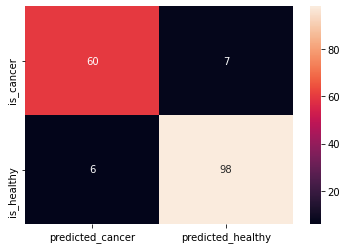

In [17]:
y_predict_std = grid_svc_bagging_std.predict(X_test_std_scaled)
cm = confusion_matrix(y_test, y_predict_std)

cm = np.array(confusion_matrix(y_test, y_predict_std, labels=cancer_labels))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])

confusion


print(classification_report(y_test,y_predict_std))
sns.heatmap(confusion,annot=True,fmt="d")

## GridSearch - SVC with Adaptive Boosting

In [18]:
param_grid = {
    'base_estimator': [SVC(probability=True)],
    'n_estimators': [20, 50, 100],
    'learning_rate' : [0.2, 0.5, 1.0],
    'base_estimator__C': [1, 2, 5],
    'base_estimator__gamma': [0.0001, 0.01, 'scale'],
    'base_estimator__kernel': ['rbf', 'linear'],
    'base_estimator__degree': [2, 3, 4],
    'base_estimator__max_iter': [-1],
    'base_estimator__decision_function_shape': ['ovo', 'ovr'],
    'base_estimator__tol': [1e-3, 1e-5]
}

grid_svc_adaboost_std = GridSearchCV(
    AdaBoostClassifier(),param_grid,cv=KF_K,scoring=recall_scorer,refit=True,verbose=1,n_jobs=-1
)
grid_svc_adaboost_std.fit(X_train_std_scaled,y_train)


print (grid_svc_adaboost_std.best_params_)
print ('\n')
print (grid_svc_adaboost_std.best_estimator_)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 8402 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed:  7.2min finished


{'base_estimator': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False), 'base_estimator__C': 1, 'base_estimator__decision_function_shape': 'ovo', 'base_estimator__degree': 2, 'base_estimator__gamma': 'scale', 'base_estimator__kernel': 'rbf', 'base_estimator__max_iter': -1, 'base_estimator__tol': 0.001, 'learning_rate': 0.2, 'n_estimators': 50}


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=1, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovo', degree=2,
                                      gamma='scale', kernel='rbf', max_iter=-1,
                                      probability=True, random_state=None,
                                      

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       104
           1       0.97      0.97      0.97        67

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



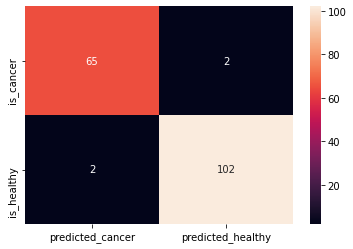

In [19]:
y_predict_std = grid_svc_adaboost_std.predict(X_test_std_scaled)
cm = confusion_matrix(y_test, y_predict_std)

cm = np.array(confusion_matrix(y_test, y_predict_std, labels=cancer_labels))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])

confusion


print(classification_report(y_test,y_predict_std))
sns.heatmap(confusion,annot=True,fmt="d")

## SVM - Overall Comparison

Evaluating model: SVM Standard
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


result: {'Scaling Method': 'SVM Standard', 'Accuracy': array([0.97076023]), 'Precision': array([0.96823244]), 'Recall': array([0.97065155]), 'F1': array([0.96940419]), 'ROC': array([0.99483352])}
Evaluating model: SVM+Bagging
Fitting 5 folds for each of 5832 candidates, totalling 29160 fits


[Parallel(n_jobs=-1)]: Done 254 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 1322 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 1872 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 2522 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 3272 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 4122 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 5072 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6122 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7272 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 8522 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 9872 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 11322 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 12872 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 14522 tasks      | elapsed: 

result: {'Scaling Method': 'SVM+Bagging', 'Accuracy': array([0.92397661]), 'Precision': array([0.92121212]), 'Recall': array([0.91891504]), 'F1': array([0.92002734]), 'ROC': array([0.98550517])}
Evaluating model: SVM+Boosting
Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 8402 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed:  7.2min finished


result: {'Scaling Method': 'SVM+Boosting', 'Accuracy': array([0.97660819]), 'Precision': array([0.97545924]), 'Recall': array([0.97545924]), 'F1': array([0.97545924]), 'ROC': array([0.99555109])}


,Accuracy,Precision,Recall,F1,ROC
Scaling Method,,,,,
SVM Standard,0.970760,0.968232,0.970652,0.969404,0.994834
SVM+Bagging,0.923977,0.921212,0.918915,0.920027,0.985505
SVM+Boosting,0.976608,0.975459,0.975459,0.975459,0.995551


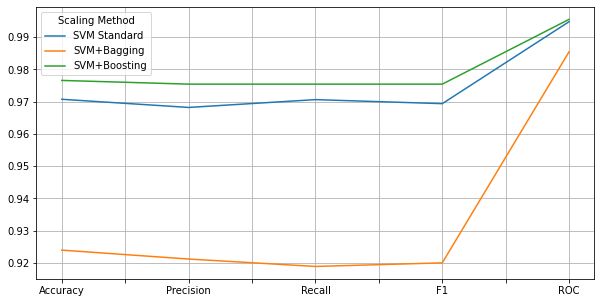

In [20]:
k_fold_models = [
    {'name': 'SVM Standard', 'model': grid_svc_std},
    {'name': 'SVM+Bagging', 'model': grid_svc_bagging_std},
    {'name': 'SVM+Boosting', 'model': grid_svc_adaboost_std}
]
column_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC']
k_fold_res_df = pd.DataFrame(columns=column_names)

for item in k_fold_models:
    eval_model = item['model']
    eval_name = item['name']
    print(f"Evaluating model: {item['name']}")
    
    X_k_train = X_train_std_scaled
    X_k_test = X_test_std_scaled

    eval_model.fit(X_k_train, y_train)
    predictions = eval_model.predict(X_k_test)
    predictions_proba = eval_model.predict_proba(X_k_test)
    
    result = {
        'Scaling Method': eval_name,
        'Accuracy': accuracy_score(y_test, predictions).flatten(),
        'Precision': precision_score(y_test, predictions, average="macro").flatten(),
        'Recall': recall_score(y_test, predictions, average="macro").flatten(),
        'F1': f1_score(y_test, predictions, average="macro").flatten(),
        'ROC': roc_auc_score(y_test, predictions_proba[:,1]).flatten()
    }
    print(f"result: {result}")
    k_fold_res_df = k_fold_res_df.append(pd.DataFrame(result, columns=column_names))
    print("=================================")
    

    
k_fold_res_df.set_index('Model', inplace=True)
invert_scale_scores_df = k_fold_res_df.transpose()

invert_scale_scores_df.plot(figsize=(10,5), grid=True)

k_fold_res_df.head()

# GridSearch - Logistic Regression

In [21]:
param_grid = {'penalty': ['l2'],
              'C': [1, 10, 50, 100],
            }
grid_lr = GridSearchCV(LogisticRegression(),param_grid,cv=KF_K,scoring=recall_scorer,refit=True,verbose=1,n_jobs=-1)
grid_lr.fit(X_train_std_scaled,y_train)


print (grid_lr.best_params_)
print ('\n')
print (grid_lr.best_estimator_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


{'C': 1, 'penalty': 'l2'}


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.0s finished


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       104
           1       0.97      0.97      0.97        67

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



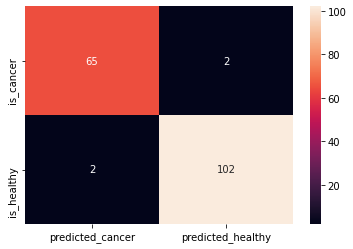

In [22]:
y_predict = grid_lr.predict(X_test_std_scaled)
cm = confusion_matrix(y_test, y_predict)

cm = np.array(confusion_matrix(y_test, y_predict, labels=cancer_labels))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])

confusion


print(classification_report(y_test,y_predict))
sns.heatmap(confusion,annot=True,fmt="d")

# GridSearch - Decision Trees

In [23]:
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [1, 5, 10, 20, 30],
            }
grid_dt = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=KF_K,scoring=recall_scorer,refit=True,verbose=1,n_jobs=-1)
grid_dt.fit(X_train_std_scaled,y_train)


print (grid_dt.best_params_)
print ('\n')
print (grid_dt.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


{'criterion': 'entropy', 'max_depth': 30, 'splitter': 'best'}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       104
           1       0.92      0.88      0.90        67

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



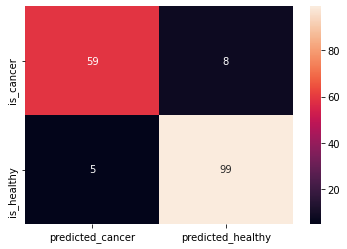

In [24]:
y_predict = grid_dt.predict(X_test_std_scaled)
cm = confusion_matrix(y_test, y_predict)

cm = np.array(confusion_matrix(y_test, y_predict, labels=cancer_labels))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])

confusion


print(classification_report(y_test,y_predict))
sns.heatmap(confusion,annot=True,fmt="d")

# Naive Bayes (no hyper-parameters)

In [25]:
model_nb = GaussianNB()
model_nb.fit(X_train_std_scaled,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       104
           1       0.98      0.90      0.94        67

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



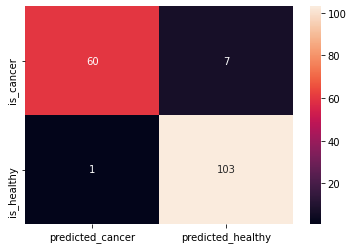

In [26]:
y_predict = model_nb.predict(X_test_std_scaled)
cm = confusion_matrix(y_test, y_predict)

cm = np.array(confusion_matrix(y_test, y_predict, labels=cancer_labels))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])

confusion


print(classification_report(y_test,y_predict))
sns.heatmap(confusion,annot=True,fmt="d")

# Ensemble method - Stacking

In [28]:
meta_classifier_model = MLPClassifier(max_iter=500, verbose=False) # hidden_layer_sizes=(100,100,100)

# Define parameter grid 
params = {
          "meta_classifier": [meta_classifier_model],
          "meta_classifier__learning_rate": ["constant", "adaptive"], # invscaling
          "meta_classifier__hidden_layer_sizes": [(50,50,50), (50,100,50), (100,)],
          "meta_classifier__solver": ['sgd', 'adam'],
          "meta_classifier__activation": ["logistic", "relu", "tanh"]
         }

stack_cvc_mlp = StackingCVClassifier(classifiers=[grid_svc_adaboost_std, grid_lr, grid_dt, model_nb],
                            shuffle=False,
                            use_probas=True,
                            cv=KF_K,
                            meta_classifier=meta_classifier_model)


# Initialize GridSearchCV
# grid_stack_cvc_mlp = GridSearchCV(
#                     estimator=stack_cvc_mlp, 
#                     param_grid=params, 
#                     cv=5,
#                     scoring=recall_scorer,
#                     verbose=1,
#                     n_jobs=-1)

stack_cvc_mlp.fit(X_train_std_scaled, y_train)
        

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 1250 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 1800 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 2450 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4050 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 5000 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 6050 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 7200 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 8450 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backen

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 8402 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed:  3.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 8402 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed:  4.0min finished


Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 8402 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed:  4.6min finished


Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 8402 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed:  4.7min finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 8402 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed:  7.2min finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


StackingCVClassifier(classifiers=[GridSearchCV(cv=5, error_score=nan,
                                               estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                                            base_estimator=None,
                                                                            learning_rate=1.0,
                                                                            n_estimators=50,
                                                                            random_state=None),
                                               iid='deprecated', n_jobs=-1,
                                               param_grid={'base_estimator': [SVC(C=1,
                                                                                  break_ties=False,
                                                                                  cache_size=200,
                                                                                  class_wei

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       104
           1       1.00      0.97      0.98        67

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



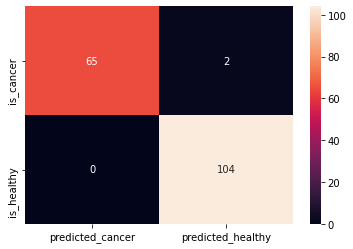

In [29]:
y_predict = stack_cvc_mlp.predict(X_test_std_scaled)
cm = confusion_matrix(y_test, y_predict)

cm = np.array(confusion_matrix(y_test, y_predict, labels=cancer_labels))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])

confusion


print(classification_report(y_test,y_predict))
sns.heatmap(confusion,annot=True,fmt="d")

# K-Fold Validation

In [ ]:
k_fold_models = [    
    {'name': 'Logistic Regression', 'model': grid_lr},
    {'name': 'SVM + AdaBoost', 'model': grid_svc_adaboost_std},
    {'name': 'Decision Trees', 'model': grid_dt},
    {'name': 'Naive Bayes', 'model': model_nb},
    {'name': 'Stacking MLP', 'model': stack_cvc_mlp}
]

column_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC', 'MCC']
k_fold_res_df = pd.DataFrame(columns=column_names)

k_fold_res = []

for item in k_fold_models:
    eval_model = item['model']
    print(f"Evaluating model: {item['name']}")
    
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    cohen_kappa_scores = []
    roc_auc_scores = []
    prc_scores = []
    mcc_scores = []

    for train_index, test_index in kf.split(X_train_std_scaled):
        X_k_train = X_train_std_scaled[X_train_std_scaled.index.isin(train_index)]
        y_k_train = y_train[y_train.index.isin(train_index)]

        X_k_test = X_train_std_scaled[X_train_std_scaled.index.isin(test_index)]
        y_k_test = y_train[y_train.index.isin(test_index)]

        print(f"TRAIN: {len(train_index)}, TEST: {len(test_index)}, X_k_train: {X_k_train.shape}, X_k_test: {X_k_test.shape}")

        eval_model.fit(X_k_train, y_k_train)
        predictions = eval_model.predict(X_k_test)
        predictions_proba = eval_model.predict_proba(X_k_test)

        accuracy_scores.append(accuracy_score(y_k_test, predictions))
        precision_scores.append(precision_score(y_k_test, predictions, average="macro"))
        recall_scores.append(recall_score(y_k_test, predictions, average="macro"))
        f1_scores.append(f1_score(y_k_test, predictions, average="macro"))
        roc_auc_scores.append(roc_auc_score(y_k_test, predictions_proba[:,1]))
        prc_scores.append(precision_recall_curve(y_k_test, predictions_proba[:,1]))
        mcc_scores.append(matthews_corrcoef(y_k_test, predictions))
        
    
    print(f"SVC K-Fold mean_accuracy_score: {np.round(np.mean(accuracy_scores), 3)}, accuracy_scores: {accuracy_scores}")
    print(f"SVC K-Fold mean_precision_score: {np.round(np.mean(precision_scores), 3)}, precision_scores: {precision_scores}")
    print(f"SVC K-Fold mean_recall_score: {np.round(np.mean(recall_scores), 3)}, recall_scores: {recall_scores}")
    print(f"SVC K-Fold mean_f1_score: {np.round(np.mean(f1_scores), 3)}, f1_scores: {f1_scores}")
    print(f"SVC K-Fold mean_roc_auc_score: {np.round(np.mean(roc_auc_scores), 3)}, roc_auc_scores: {roc_auc_scores}")

#     print(f"SVC K-Fold prc_scores: {prc_scores}")
    print(f"SVC K-Fold mean_mcc_score: {np.round(np.mean(mcc_scores), 3)}, mcc_scores: {mcc_scores}")

    result = {
        'Model': item['name'],
        'Accuracy': np.round(np.mean(accuracy_scores), 3).flatten(),
        'Precision': np.round(np.mean(precision_scores), 3).flatten(),
        'Recall': np.round(np.mean(recall_scores), 3).flatten(),
        'F1': np.round(np.mean(f1_scores), 3).flatten(),
        'ROC': np.round(np.mean(roc_auc_scores), 3).flatten(),
        'PRC': prc_scores,
        'MCC': np.round(np.mean(mcc_scores), 3).flatten()
    }
    k_fold_res.append(result)
    print(f"result: {result}")
    k_fold_res_df = k_fold_res_df.append(pd.DataFrame(result, columns=column_names))
    print("=================================")
    


        

Evaluating model: Logistic Regression
TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.1s remaining:    0.0s


TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
TRAIN: 319, TEST: 79, X_k_train: (319, 30), X_k_test: (79, 30)
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


TRAIN: 319, TEST: 79, X_k_train: (319, 30), X_k_test: (79, 30)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
SVC K-Fold mean_accuracy_score: 0.97, accuracy_scores: [0.95, 0.9875, 0.9625, 0.9873417721518988, 0.9620253164556962]
SVC K-Fold mean_precision_score: 0.97, precision_scores: [0.9427083333333333, 0.9919354838709677, 0.9635718891038041, 0.9905660377358491, 0.960594315245478]
SVC K-Fold mean_recall_score: 0.966, recall_scores: [0.9533333333333334, 0.9736842105263157, 0.9597186700767264, 0.9814814814814814, 0.9629870129870131]
SVC K-Fold mean_f1_score: 0.968, f1_scores: [0.9473337722185649, 0.98242144583608, 0.961482908040443, 0.9858041329739443, 0.961631860126275]
SVC K-Fold mean_roc_auc_score: 0.989, roc_auc_scores: [0.9926666666666666, 0.9741156169111302, 0.9859335038363172, 1.0, 0.990909090909091]
SVC K-Fold mean_mcc_score: 0.936, mcc_scores: [0.8959786703810408, 0.9654471944281583, 0.9232825187205841, 0.9720050670928767, 0.9235782288778845]
result: {'Model': 'Log

[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1

TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 8402 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed:  3.6min finished


TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 8402 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed:  4.1min finished


TRAIN: 319, TEST: 79, X_k_train: (319, 30), X_k_test: (79, 30)
Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 8402 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed:  4.7min finished


TRAIN: 319, TEST: 79, X_k_train: (319, 30), X_k_test: (79, 30)
Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 8402 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed:  4.7min finished


SVC K-Fold mean_accuracy_score: 0.98, accuracy_scores: [0.9625, 0.9875, 1.0, 0.9873417721518988, 0.9620253164556962]
SVC K-Fold mean_precision_score: 0.98, precision_scores: [0.9575378538512178, 0.9919354838709677, 1.0, 0.9905660377358491, 0.960594315245478]
SVC K-Fold mean_recall_score: 0.976, recall_scores: [0.9633333333333334, 0.9736842105263157, 1.0, 0.9814814814814814, 0.9629870129870131]
SVC K-Fold mean_f1_score: 0.978, f1_scores: [0.9602583209140587, 0.98242144583608, 1.0, 0.9858041329739443, 0.961631860126275]
SVC K-Fold mean_roc_auc_score: 0.993, roc_auc_scores: [0.9893333333333333, 0.9775668679896461, 1.0, 0.9992877492877492, 0.9974025974025975]
SVC K-Fold mean_mcc_score: 0.956, mcc_scores: [0.9208529501523341, 0.9654471944281583, 1.0, 0.9720050670928767, 0.9235782288778845]
result: {'Model': 'SVM + AdaBoost', 'Accuracy': array([0.98]), 'Precision': array([0.98]), 'Recall': array([0.976]), 'F1': array([0.978]), 'ROC': array([0.993]), 'PRC': [(array([0.66666667, 0.65909091, 0.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s


TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s


TRAIN: 318, TEST: 80, X_k_train: (318, 30), X_k_test: (80, 30)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s


TRAIN: 319, TEST: 79, X_k_train: (319, 30), X_k_test: (79, 30)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


TRAIN: 319, TEST: 79, X_k_train: (319, 30), X_k_test: (79, 30)
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


SVC K-Fold mean_accuracy_score: 0.937, accuracy_scores: [0.925, 0.9375, 0.8875, 0.9620253164556962, 0.9746835443037974]
SVC K-Fold mean_precision_score: 0.932, precision_scores: [0.9199999999999999, 0.9202508960573477, 0.8840351979886863, 0.961901306240929, 0.9743506493506493]
SVC K-Fold mean_recall_score: 0.929, recall_scores: [0.9199999999999999, 0.9046591889559965, 0.8906649616368286, 0.9533475783475783, 0.9743506493506493]
SVC K-Fold mean_f1_score: 0.93, f1_scores: [0.9199999999999999, 0.9121072291804, 0.8860579205570502, 0.9574123989218328, 0.9743506493506493]
SVC K-Fold mean_roc_auc_score: 0.93, roc_auc_scores: [0.9276666666666666, 0.9046591889559965, 0.8906649616368285, 0.9533475783475783, 0.9743506493506494]
SVC K-Fold mean_mcc_score: 0.861, mcc_scores: [0.84, 0.8247627216517418, 0.7746717908622774, 0.9152089130245799, 0.9487012987012987]
result: {'Model': 'Decision Trees', 'Accuracy': array([0.937]), 'Precision': array([0.932]), 'Recall': array([0.929]), 'F1': array([0.93]), '

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 1456 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 2356 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 3456 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 4756 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 9000 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 9720 out of 9720 | elapsed:   56.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 1456 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 2356 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 3456 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 4756 tasks      | elapsed:   40.0s


In [413]:
k_fold_res_df.head()

,Model,Accuracy,Precision,Recall,F1,ROC
0,Support Vector,0.965,0.965,0.960,0.962,0.991
0,Logistic Regression,0.970,0.970,0.966,0.968,0.989
0,Decision Trees,0.920,0.913,0.919,0.914,0.919
0,Naive Bayes,0.932,0.928,0.924,0.926,0.983
0,Stacking MLP,0.970,0.970,0.965,0.967,0.990


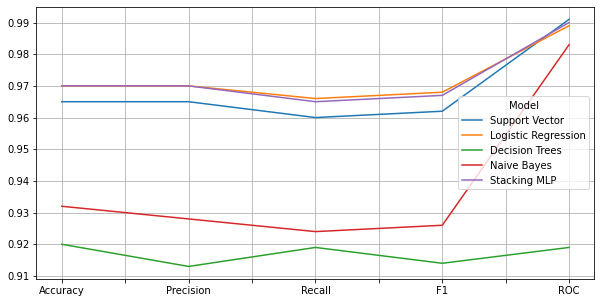

In [414]:
k_fold_res_df.set_index('Model', inplace=True)
invert_scale_scores_df = k_fold_res_df.transpose()

invert_scale_scores_df.plot(figsize=(10,5), grid=True)

# Results from testing data

In [ ]:
k_fold_models = [
    {'name': 'SVM + AdaBoost', 'model': grid_svc_adaboost_std},
    {'name': 'Logistic Regression', 'model': grid_lr},
    {'name': 'Decision Trees', 'model': grid_dt},
    {'name': 'Naive Bayes', 'model': model_nb},
    {'name': 'Stacking MLP', 'model': stack_cvc_mlp}
]

column_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC', 'PRC', 'MCC']
k_fold_res_df = pd.DataFrame(columns=column_names)

for item in k_fold_models:
    eval_model = item['model']
    eval_name = item['name']
    print(f"Evaluating model: {item['name']}")
    
    if eval_name == 'SVM MinMax':
        X_k_train = X_train_mm_scaled
        X_k_test = X_test_mm_scaled
    elif eval_name == 'SVM Standard':
        X_k_train = X_train_std_scaled
        X_k_test = X_test_std_scaled
    else: # fail
        X_k_train = None
        X_k_test = None
        
    eval_model.fit(X_k_train, y_train)
    predictions = eval_model.predict(X_k_test)
    predictions_proba = eval_model.predict_proba(X_k_test)
    
    result = {
        'Model': eval_name,
        'Accuracy': accuracy_score(y_test, predictions).flatten(),
        'Precision': precision_score(y_test, predictions, average="macro").flatten(),
        'Recall': recall_score(y_test, predictions, average="macro").flatten(),
        'F1': f1_score(y_test, predictions, average="macro").flatten(),
        'ROC': roc_auc_score(y_test, predictions_proba[:,1]).flatten(),
        'PRC': np.round(np.mean(prc_scores), 3).flatten(),
        'MCC': np.round(np.mean(mcc_scores), 3).flatten()
    }
    print(f"result: {result}")
    k_fold_res_df = k_fold_res_df.append(pd.DataFrame(result, columns=column_names))
    print("=================================")
    

    
k_fold_res_df.set_index('Model', inplace=True)
invert_scale_scores_df = k_fold_res_df.transpose()

invert_scale_scores_df.plot(figsize=(10,5), grid=True)

k_fold_res_df.head()